# METHODOLOGY-OSEMN

a. Obtain -Types of Data collected, Sources, Reliability 

b. Scrub -Processes done to clean the dataset, types of imputation used etc. 

c. Explore -Exploratory Data Analysis to investigate the data in terms of anomalies, and to check assumptions using statistics and graphical representations. 

 
**OSEMN Framework:**


>Obtain – Data Collection 

To obtain the data from available data sources. It is very important to collect complete and reliable data.

>Scrub – Data Cleaning 

Fixing or removing incorrect, corrupted, inonsistent, duplicate, or incomplete data within a dataset. 

>Explore – Data Analysis 

Understand the data to figure out the course of actions and areas that can be explored in the modeling phase.

# Obtain – Data Collection

* a. Obtain -Types of Data collected, Sources, Reliability 

Link to Dataset used:
https://www.kaggle.com/datasets/ealaxi/paysim1?datasetId=1069&language=Python

## Data Overview
This part of the data summary is mainly to have a general understanding of the data set, to do a first acquaintance with the data, including a brief understanding of the data (head, tail), row information (shape), statistical characteristics of the data (describe), information about the data (info), etc.

1. load various data science and visualization libraries:
    - Data science libraries pandas, numpy, scipy.
    - visualization libraries matplotlib, seaborn.
    - others.
2. loading data.
    - Loading entire datasets.
    - Abridged observation of the data (head()+shape).
3. overview of the data:
    - Familiarize with the statistics associated with the data using describe()
    - Familiarize with the data types using info()

### Import data science and visualization libraries

In [1]:
#coding:utf-8
#Import the warnings package and use filters to implement ignore warning statements.
# import warnings
# warnings.filterwarnings('ignore')

#The magic method in IPython notebook to get the image directly 
#after each run and no longer need to use plt.show()
%matplotlib inline  

import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
sns.set(palette="pastel")

import missingno as msno # Visualization of missing values

pylab.rcParams[ 'figure.figsize' ] = 16,9

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc )
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

from xgboost import XGBClassifier, plot_importance

In [65]:
import warnings
warnings.filterwarnings('ignore')


### Load Dataset

In [2]:
# ori_data=pd.read_csv('./Fraud_ori.csv')
ori_data=pd.read_csv('./Datasets/Paysim.csv')

###### Dataset info

In [3]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


###### View dataframe sample

In [4]:
ori_data.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5054416,354,CASH_IN,147291.15,C1025590522,77268.00,224559.15,C5214019,336929.26,189638.11,0,0
1792512,162,PAYMENT,14313.72,C719720458,0.00,0.00,M1826019468,0.00,0.00,0,0
3306758,252,PAYMENT,8208.50,C133874274,9919.00,1710.50,M1389956070,0.00,0.00,0,0
2687634,210,CASH_IN,163347.63,C1256732139,4470104.34,4633451.97,C479025992,14628029.39,14464681.76,0,0
4664054,330,CASH_OUT,224544.05,C1923796286,0.00,0.00,C1108235921,693364.62,707595.44,0,0


###### Dataset size

In [5]:
ori_data.shape

(6362620, 11)

###### View column names

In [6]:
ori_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

All the column names with descriptions are shown below.

* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - amount of the transaction in local currency.

* nameOrig - customer who started the transaction

* oldbalanceOrg - initial balance before the transaction

* newbalanceOrig - new balance after the transaction

* nameDest - customer who is the recipient of the transaction

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# Scrub – Data Cleaning

* b. Scrub -Processes done to clean the dataset, types of imputation used etc. 

###### Identify columns with missing values

In [7]:
ori_data.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

No missing values are found.

###### Identify duplicated rows

In [8]:
ori_data.duplicated().sum()

0

All rows are unique.

###### Count number of Fraud and Non-Fraud transactions

In [9]:
# custom_autopct function
def custom_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.4f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [10]:
isFraudCount = ori_data['isFraud'].value_counts()
isFraudCount

0    6354407
1       8213
Name: isFraud, dtype: int64

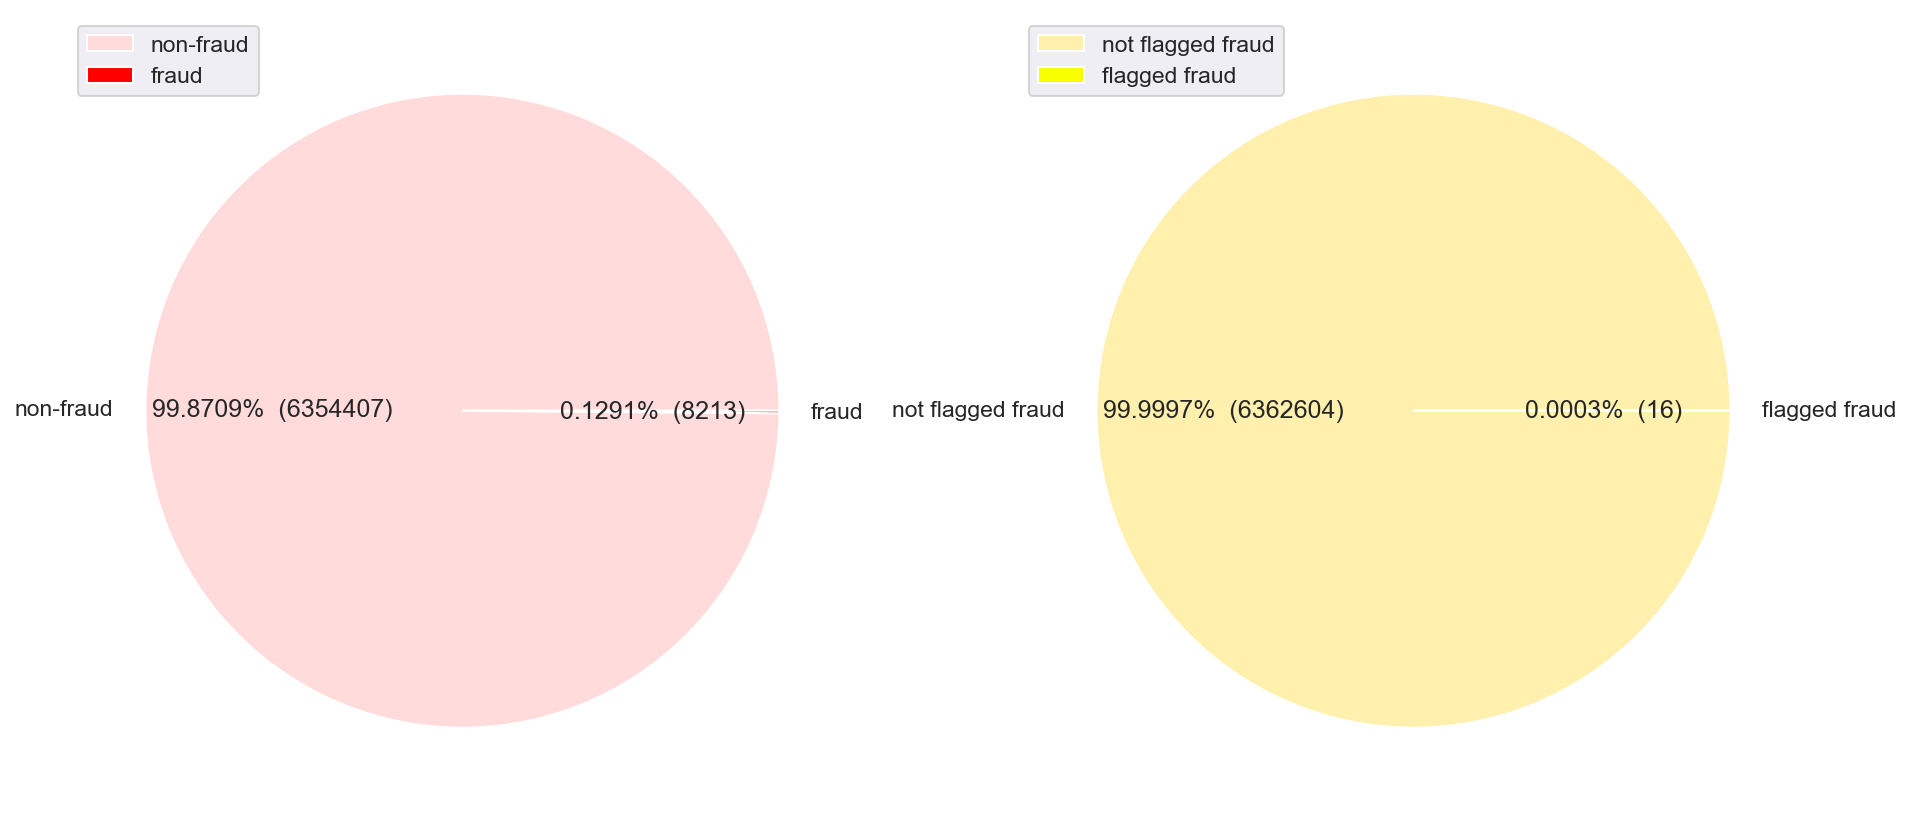

In [11]:
plt.figure(figsize=(15,15),dpi=150)
isFraudCount = ori_data['isFraud'].value_counts()
plt.subplot(1,2,1)
plt.pie(isFraudCount, labels=['non-fraud','fraud'], colors=['#FFDBDB','#FF0000'], autopct=custom_autopct(isFraudCount))
plt.legend(loc='upper left')

isFlaggedFraudCount = ori_data['isFlaggedFraud'].value_counts()
plt.subplot(1,2,2)
plt.pie(isFlaggedFraudCount, labels=['not flagged fraud','flagged fraud'], colors=['#FFF0AE','#F7FF00'], autopct=custom_autopct(isFlaggedFraudCount))
plt.legend(loc='upper left')

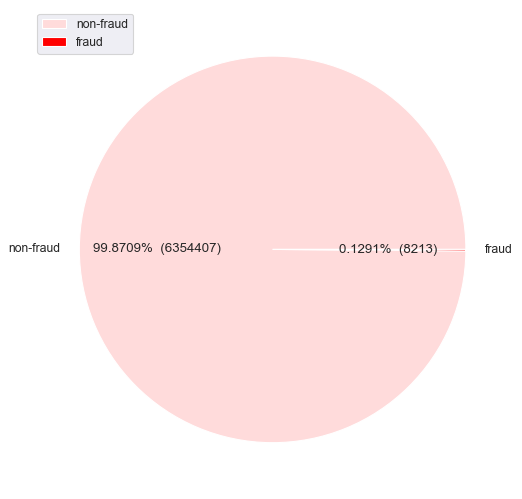

In [12]:
plt.figure(figsize=(8,8),dpi=80)
plt.pie(isFraudCount, labels=['non-fraud','fraud'], colors=['#FFDBDB','#FF0000'], autopct=custom_autopct(isFraudCount))
plt.legend(loc='upper left')

###### Count number of isFlaggedFraud and NotFlaggedFraud transactions

In [13]:
isFlaggedFraudCount = ori_data['isFlaggedFraud'].value_counts()
isFlaggedFraudCount

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

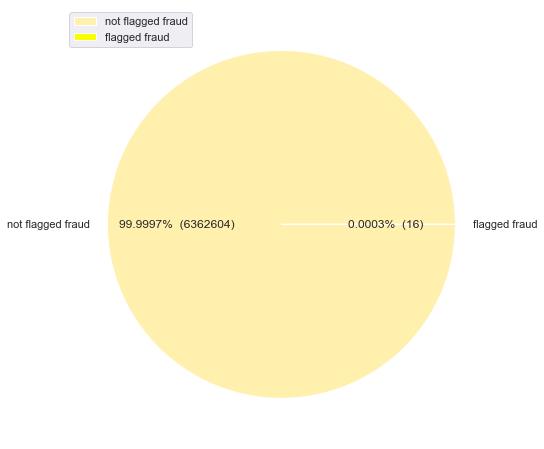

In [14]:
plt.figure(figsize=(8,8))
plt.pie(isFlaggedFraudCount, labels=['not flagged fraud','flagged fraud'], colors=['#FFF0AE','#F7FF00'], autopct=custom_autopct(isFlaggedFraudCount))
plt.legend(loc='upper left')

The analysis above shows that the data are very imblanced.

The number of fraud transactions composes 99.8% of the total transactions recorded, meanwhile non-fraud transactions contributes less than 1%.

It is even worse for isFlaggedFraud transactions.

This will be explored further in the modelling phase.

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

# Explore – Data Analysis

* c. Explore -Exploratory Data Analysis to investigate the data in terms of anomalies, and to check assumptions using statistics and graphical representations.

### Descriptive Statistical Summary of the data
The descriptive statistics allow us to get a general idea of the data within each feature. The statistical attributes are:
- count: the number of counts
- mean: average
- std: standard deviation
- min: minimum value
- 25%: upper quartile
- 50%: median
- 75%: lower quartile
- max: maximum value

In [15]:
ori_data['isFraud'].unique()

array([0, 1])

In [16]:
ori_data['isFlaggedFraud'].unique()

array([0, 1])

In [17]:
ori_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


It can be seen that `isFraud` and `isFlaggedFraud` are a dichotomous variables.

These are continuous variables:
`oldbalanceOrg `
`newbalanceOrig `
`oldbalanceDest`
`newbalanceDest`

### Type of transactions

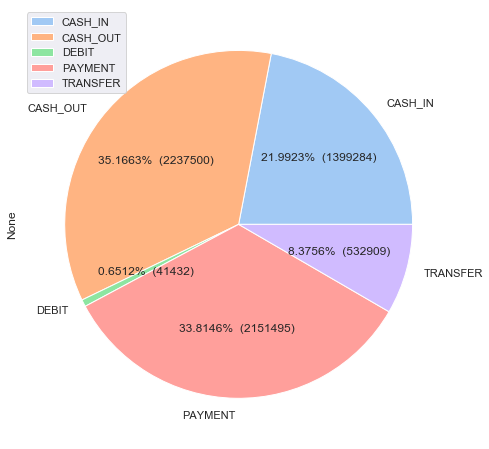

In [18]:
plt.figure(figsize=(8,8))
ori_data.groupby('type').size().plot(kind='pie',autopct=custom_autopct(ori_data['type'].value_counts()))
plt.legend(loc='upper left')

### Count of Fraud and Non-Fraud Transactions in each type of Transaction

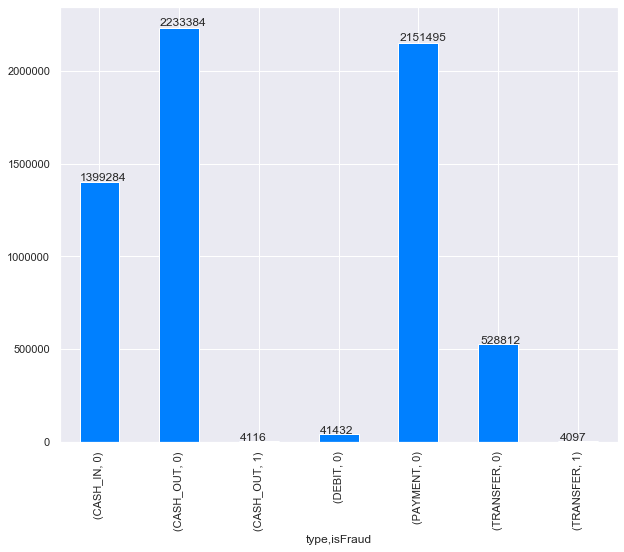

In [19]:
plt.figure(figsize=(10,8))
ax = ori_data.groupby(['type','isFraud']).size().plot(kind='bar', color='#0080FF')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Data above shows that only CASH_OUT and TRANSFER have fraud transactions.

We can infer that only these two types of transactions will have fraud activity.

It is likely that fraud happens by fund TRANSFER to one account, then being CASH_OUT from that account.

Thus we can remove observations of other types.

In [20]:
data = ori_data.drop(ori_data[(ori_data.type == 'PAYMENT') | (ori_data.type == 'DEBIT') | (ori_data.type == 'CASH_IN')].index)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 253.6+ MB


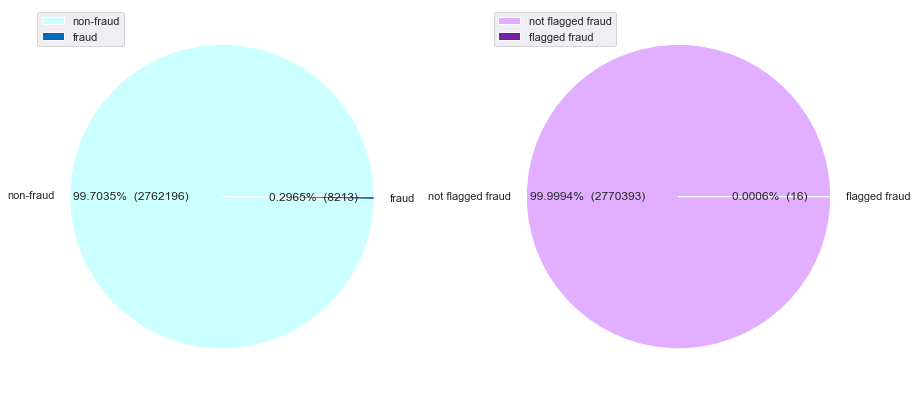

In [22]:
plt.figure(figsize=(15,15))
isFraudCount = data['isFraud'].value_counts()
plt.subplot(1,2,1)
plt.pie(isFraudCount, labels=['non-fraud','fraud'], colors=['#CCFFFF','#006ABC'], autopct=custom_autopct(isFraudCount))
plt.legend(loc='upper left')

isFlaggedFraudCount = data['isFlaggedFraud'].value_counts()
plt.subplot(1,2,2)
plt.pie(isFlaggedFraudCount, labels=['not flagged fraud','flagged fraud'], colors=['#E2AEFF','#741FA5'], autopct=custom_autopct(isFlaggedFraudCount))
plt.legend(loc='upper left')

### Continuous feature analysis

The following is an analysis of the continuous variables feature.

In [23]:
# Select data from the list of columns defined
cont = data[['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
cont_num = list()
for x in cont:
    v = len(data[x].value_counts())
    cont_num.append([v, x])
cont_num.sort()
for x in cont_num:
    print(x[1] + "'s kinds of value:", x[0])

newbalanceOrig's kinds of value: 271977
oldbalanceOrg's kinds of value: 435702
oldbalanceDest's kinds of value: 2360852
newbalanceDest's kinds of value: 2562844


In [24]:
con_cont=['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

cont=[]

for i in range(len(data.columns)):
    feature = data.columns[i]
    if feature.find('bin') != -1:
        bin_.append(feature)
    elif feature.find('cat')!= -1:
        cat.append(feature)
    elif feature != 'target' and feature != 'id':
        cont.append(feature)

rank_cont = [x for x in cont if x not in con_cont]
rank_cont

['step', 'type', 'amount', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud']

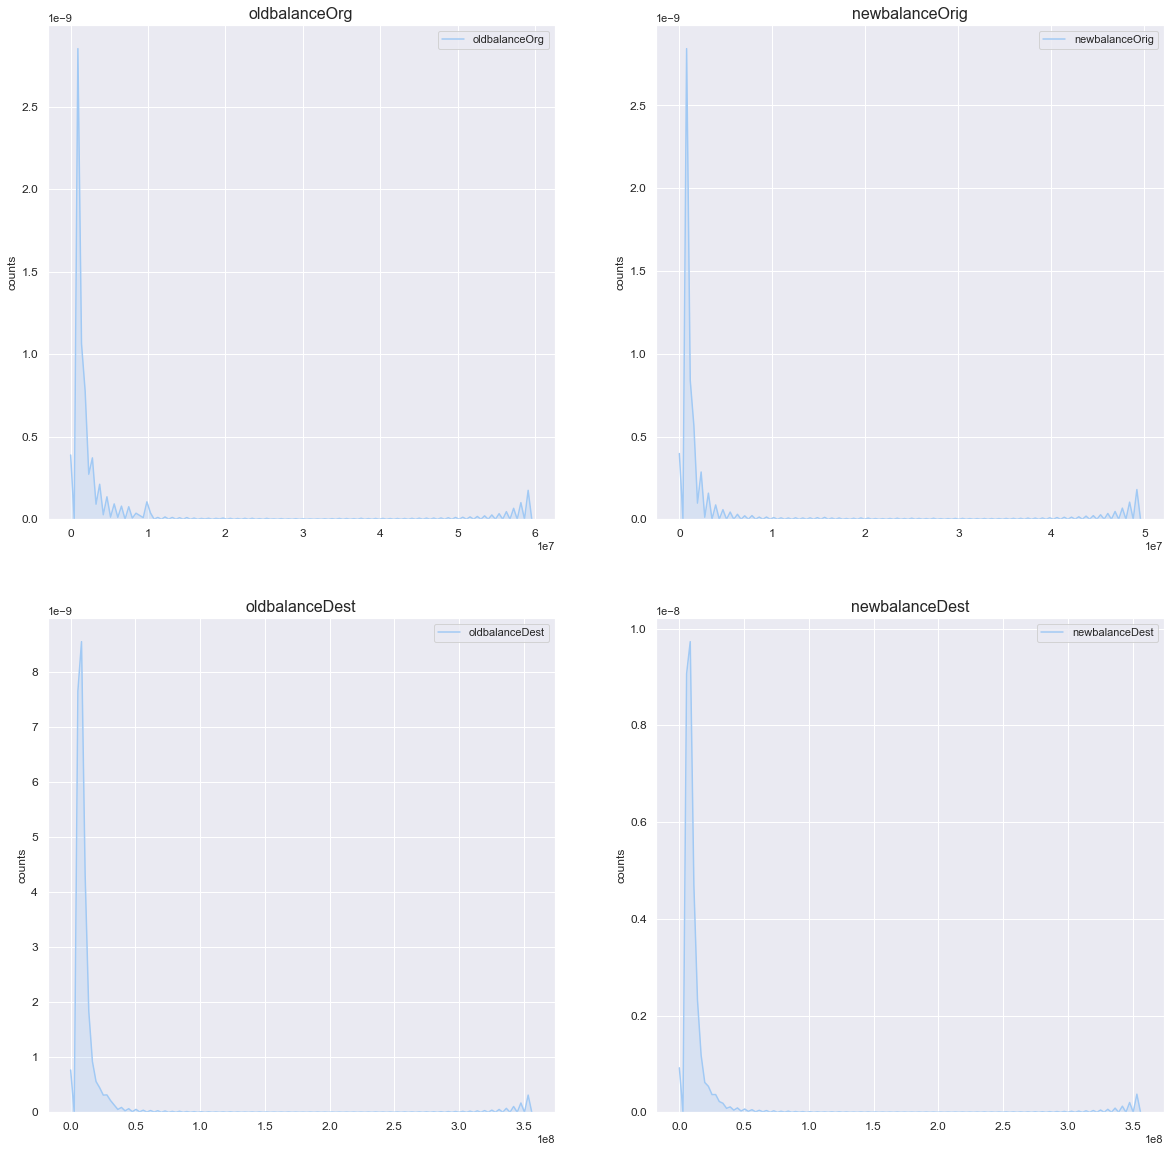

In [25]:
#Continuous Variable Analysis
k = 0
plt.figure(figsize=(20,20)) 
for x in con_cont:
    k = k+1
    plt.subplot(2,2,k)
    plt.title(x, size=16)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.ylabel('counts')
#     sns.kdeplot(data[x].dropna(),shade=True,bw=1.5)
    sns.kdeplot(data[x].dropna(),shade=True, bw=1.5)


As can be seen from the chart: 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', all four continuous type variables belong to the right skewed distribution of the skewed distribution.

Graphically it can be understood that the skew is off to the right. So in order to achieve a sum of the differences between the data and the mean of 0, there are larger numbers to balance with, so there is a long trailing right-hand side of the distribution. The median reflects the center of the data in terms of position, so 1/2 of the data position will be to the left of the mean, while the plurality reflects the center of the data in terms of quantity and will also be to the left of the mean.

In the right skewed distribution (positive skew): mode < median < mean

### Correlation analysis

In [26]:
#Remove the useless features
data_select=data.copy()
data_select.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)
#Re-indexing 
data_select.reset_index()
#Convert type to category data, which is--- 0, 1
# data_select.loc[data_select.type=='TRANSFER','type'] = 0
# data_select.loc[data_select.type=='CASH_OUT','type'] = 1

,index,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,2,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
1,3,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
2,15,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
3,19,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
4,24,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
2770404,6362615,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
2770405,6362616,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
2770406,6362617,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
2770407,6362618,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


In [27]:
data_select

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


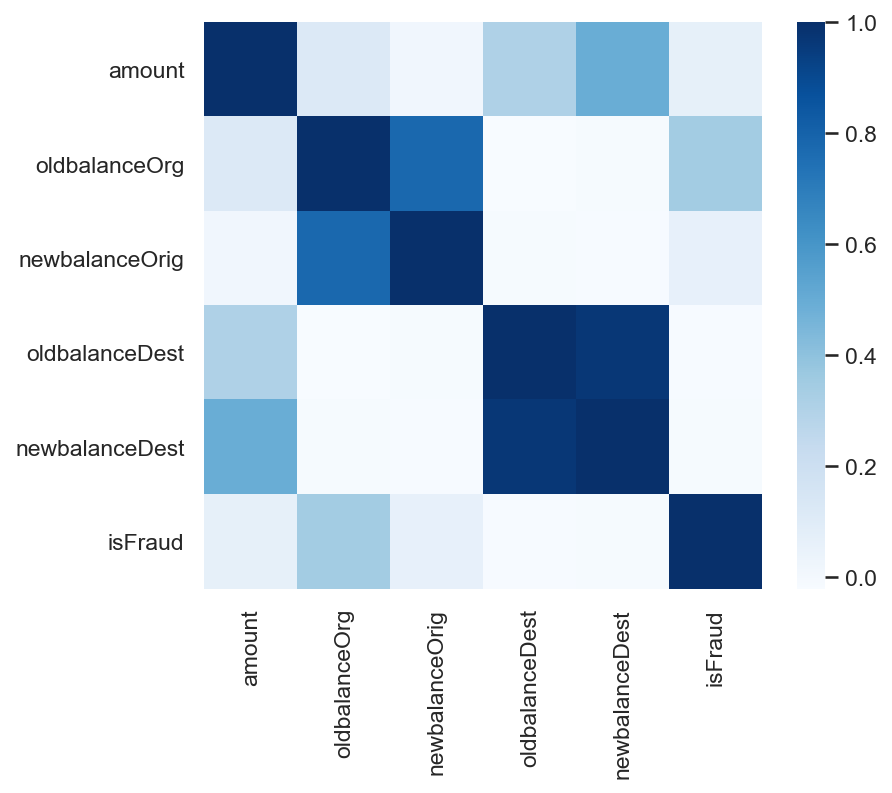

In [28]:
plt.figure(figsize = (6,5), dpi = 150)

sns.heatmap(data_select.corr(), cmap="Blues")

From the correlation heatmap above, it is seen that the following variables are having strong correlation:

oldbalanceOrg & newbalanceOrig
oldbalanceDest & newbalanceDest

Therefore we can drop two of one of the columns from each pair.

In [29]:
# # Correlation graph
# # Show the relationship between variables two by two, linear, non-linear, correlation
# data_num = data[['oldbalanceOrg','newbalanceOrig']]
# sns.pairplot(data_num,kind='reg',diag_kind='kde') 

In [30]:
# # Correlation graph
# # Show the relationship between variables two by two, linear, non-linear, correlation
# data_num = data[['oldbalanceDest','newbalanceDest']]
# sns.pairplot(data_num,kind='reg',diag_kind='kde') 

### Fraudulent transaction methods

In [31]:
data.loc[data['isFlaggedFraud']==1].type.value_counts()

TRANSFER    16
Name: type, dtype: int64

In [32]:
isFlaggedFraudDf = data.loc[data['isFlaggedFraud']==1]
isFlaggedFraudDf['type'].unique()

array(['TRANSFER'], dtype=object)

Only 16 frauds are flagged by the banking system and all are in the form of transfers, and the flagged frauds are necessarily frauds Considering that frauds tend to have a lower limit on the amount of money that can be earned from small frauds, the impact of the transaction amount is explored. At the same time, considering the fact that fraud will generally take all the deposits in the account, fraud favors the transfer account with large deposits, the transfer account is a criminal withdrawal account, so the balance before the transfer account should be very low or even 0. Based on the above considerations, the following inquiry is conducted.

[(0, 30000000.0)]

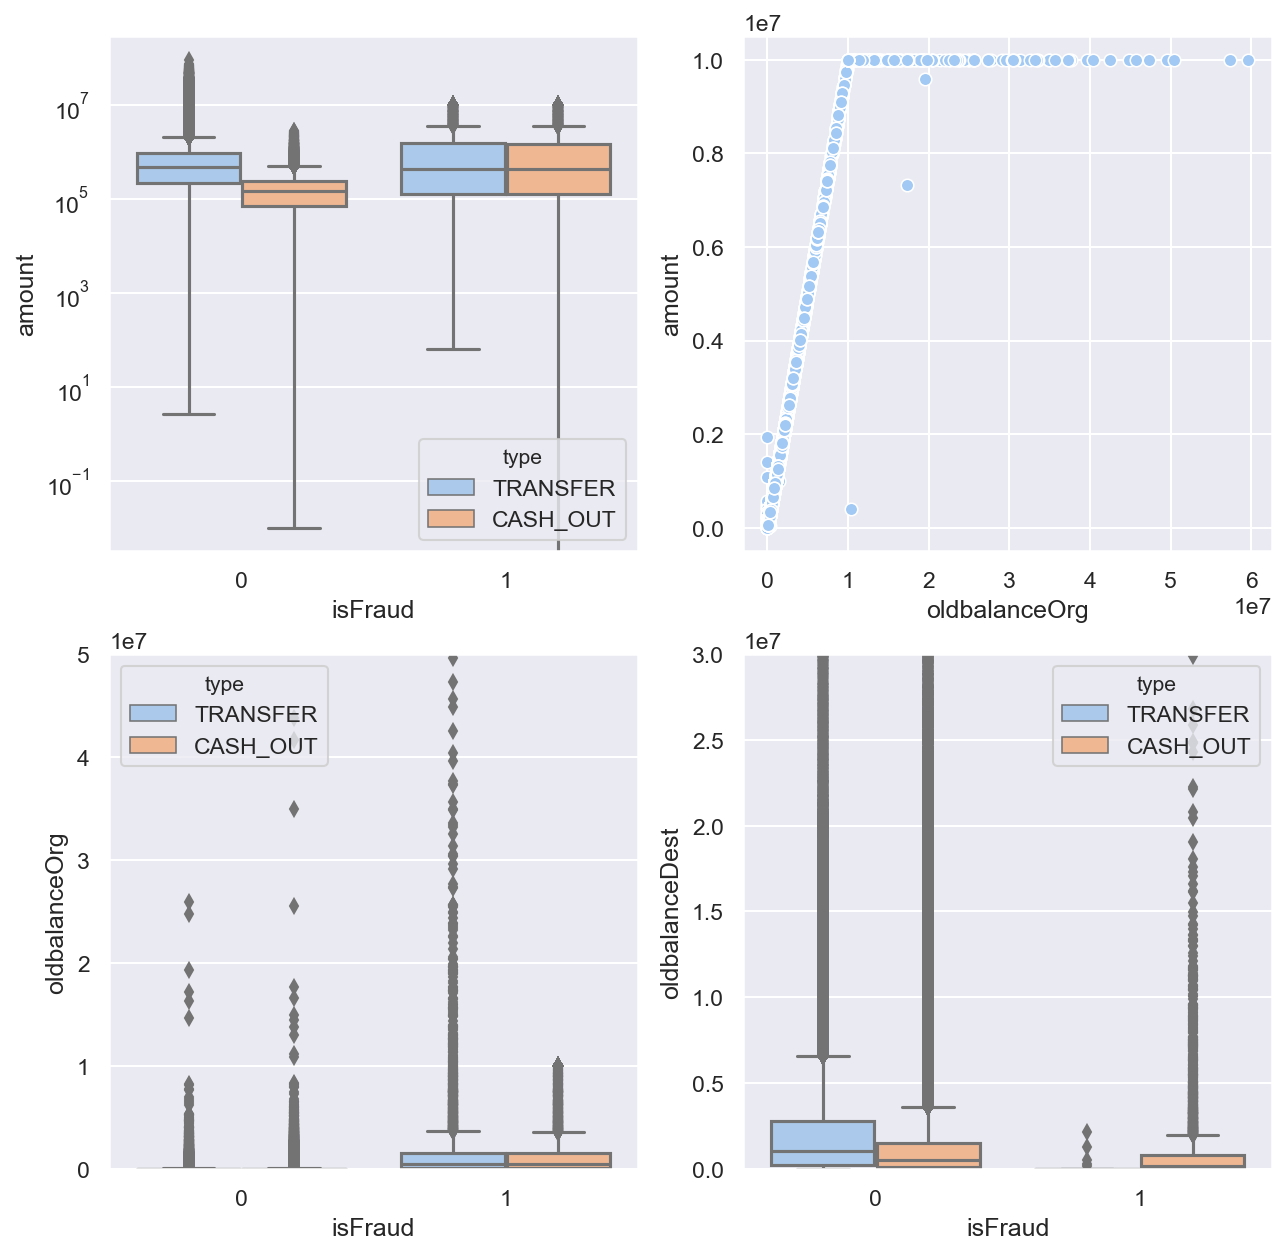

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10),dpi=150)
sns.boxplot(x='isFraud',y='amount',hue='type',data=data,ax=axs[0][0])
axs[0][0].set_yscale('log') 
sns.scatterplot(x='oldbalanceOrg', y='amount', data=data[data['isFraud'] ==1], ax=axs[0][1])
sns.boxplot(x='isFraud',y='oldbalanceOrg',hue='type',data=data,ax=axs[1][0])
axs[1][0].set(ylim=(0, 5e7)) 
sns.boxplot(x='isFraud',y='oldbalanceDest',hue='type',data=data,ax=axs[1][1])
axs[1][1].set(ylim=(0, 3e7)) 

In the two figures in the first row, the results find that there is indeed a concentration of fraudulent amounts, but given that there is also a concentration and similar amounts in non-fraudulent transfers, the AMOUNT field is not significantly representative. It is interesting to find that when the balance of the transferred account is below 1e7, the balance is completely fraudulent. However, as the balance increases, the fraudulent amount stays at 1e7, which is unexplained.

In the two charts in the second row, the fraud is concentrated in accounts with low balances in the transferred accounts, which is different from what would be expected. The balance before the transfer to the account is generally very low at the time of the fraud, which compounds the consideration that fraudsters avoid seizing accounts and try to choose vacant accounts.

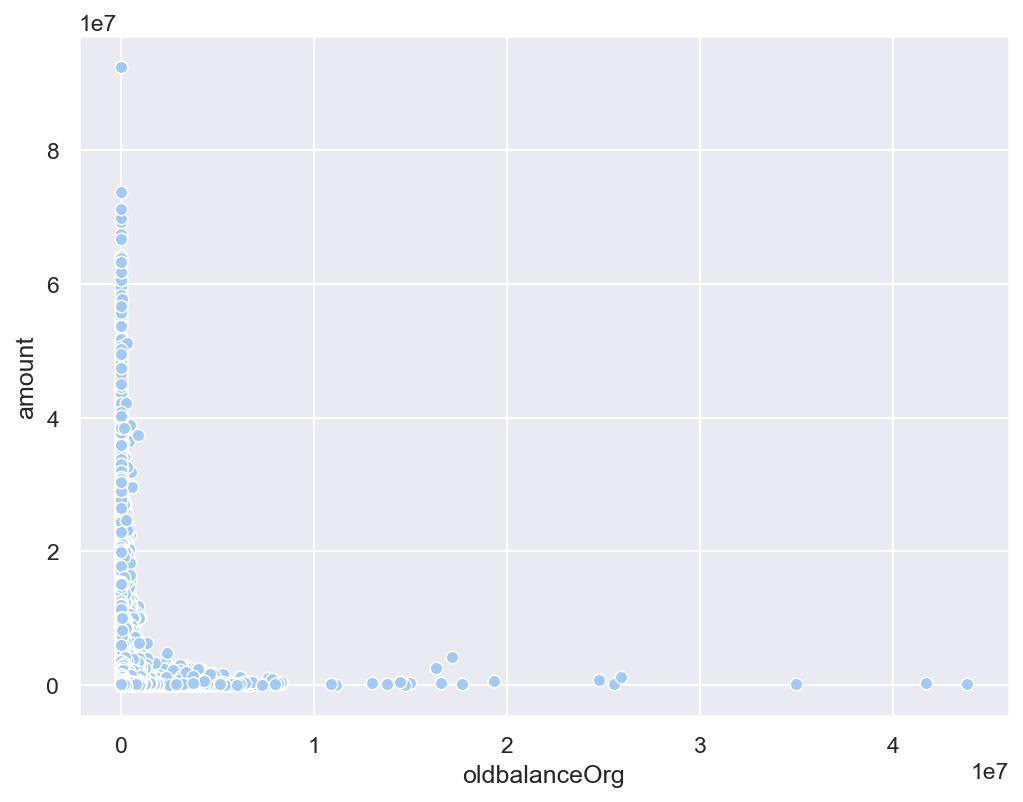

In [34]:
plt.figure(figsize = (8,6), dpi = 150)
sns.scatterplot(x='oldbalanceOrg', y='amount', data=data[data['isFraud'] ==0])

Transactions exist for amounts exceeding 10 million, but the fraudulent amount does not exceed 10 million.

In [35]:
count_fraud_10m = len(data[(data['isFraud']==0) & (data['amount'] > 10000000)].index)

In [36]:
count_non_fraud_10m = len(data[(data['isFraud']==1) & (data['amount'] > 10000000)].index)

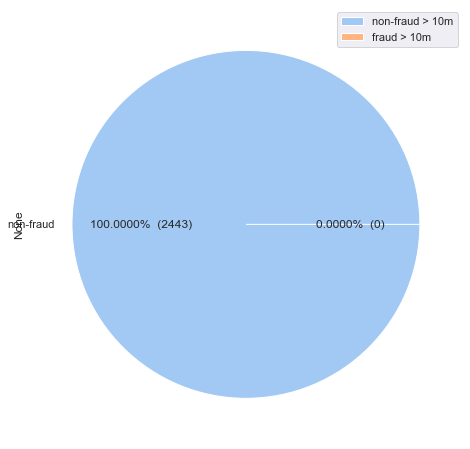

In [37]:
count_fraud_series = pd.Series(np.array([count_fraud_10m, count_non_fraud_10m]))
ax = count_fraud_series.plot.pie(y='count', labels=['non-fraud', 'fraud'], autopct=custom_autopct(count_fraud_series), figsize=(8, 8))
ax.legend(['non-fraud > 10m','fraud > 10m'])

There are 2443 transactions with transaction amount over 10 million and all of them are not fraudulent.

**Account types in the dataset beginning with M are Merchant accounts, and those beginning with C are Customer accounts**

In [38]:
data_Fraud =data.loc[data.isFraud == 1]
data_NotFraud = data.loc[data.isFraud == 0]
print("Customer transferer (fraud):",len(data_Fraud.loc[data_Fraud.nameOrig.str.contains('C')]))
print("Merchant transferer (fraud):",len(data_Fraud.loc[data_Fraud.nameOrig.str.contains('M')]))
print("Customer receiver (fraud):",len(data_Fraud.loc[data_Fraud.nameDest.str.contains('C')]))
print("Merchant receiver (fraud):",len(data_Fraud.loc[data_Fraud.nameDest.str.contains('M')]))
print("Customer transferer (non-fraud):",len(data_NotFraud.loc[data_NotFraud.nameOrig.str.contains('C')]))
print("Merchant transferer (non-fraud):",len(data_NotFraud.loc[data_NotFraud.nameOrig.str.contains('M')]))
print("Customer receiver (non-fraud):",len(data_NotFraud.loc[data_NotFraud.nameDest.str.contains('C')]))
print("Merchant receiver (not fraudulent):",len(data_NotFraud.loc[data_NotFraud.nameDest.str.contains('M')]))

Customer transferer (fraud): 8213
Merchant transferer (fraud): 0
Customer receiver (fraud): 8213
Merchant receiver (fraud): 0
Customer transferer (non-fraud): 2762196
Merchant transferer (non-fraud): 0
Customer receiver (non-fraud): 2762196
Merchant receiver (not fraudulent): 0


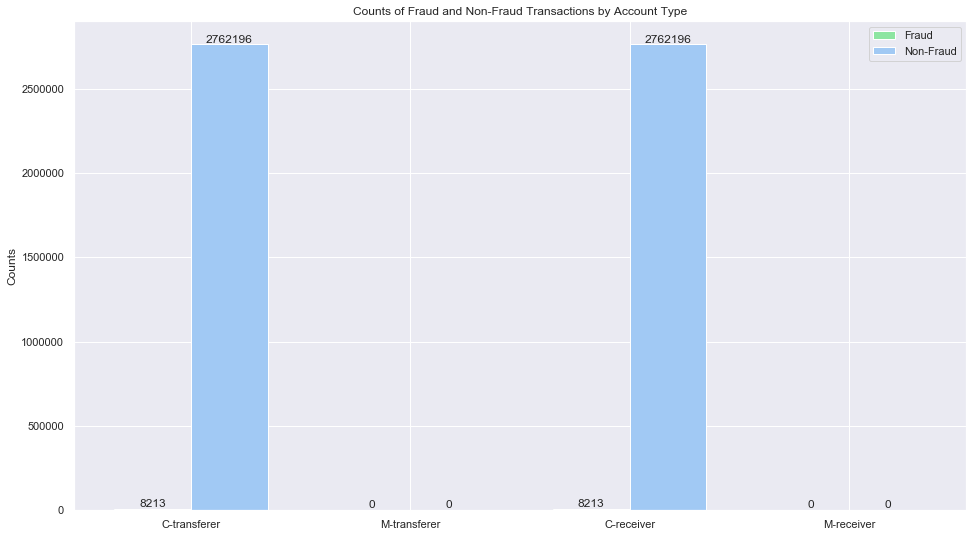

In [39]:
N = 4
fraud_num = [8213, 0, 8213, 0]
non_fraud_num = [2762196,0,2762196,0]
ind = np.arange(N)  # the x locations for the groups
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind, fraud_num, width, color='g')
rects2 = ax.bar(ind + width, non_fraud_num, width, color='b')

ax.set_ylabel('Counts')
ax.set_title('Counts of Fraud and Non-Fraud Transactions by Account Type')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('C-transferer', 'M-transferer', 'C-receiver', 'M-receiver'))

ax.legend((rects1[0], rects2[0]), ('Fraud', 'Non-Fraud'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [40]:
data_Fraud.loc[data_Fraud.nameDest.isin(data_Fraud.loc[(data_Fraud.type=='CASH_OUT')].nameOrig)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


Usually after a scam, the recipient account should transfer the money out, so check if there is a duplicate recipient and withdrawer in the scam. But the result proves that no such account exists and the logic of transferring money first and withdrawing it later represented by STEP does not reflect it

###### Check the occurence of each nameDest in TRANSFER isFraud

In [41]:
data[(data['isFraud']==1) & (data['type']=='TRANSFER')]['nameDest'].value_counts()

C1778895918    1
C1226285099    1
C2049734595    1
C1301226150    1
C428179224     1
              ..
C1093087411    1
C1942317737    1
C1744865437    1
C732697292     1
C1908047930    1
Name: nameDest, Length: 4097, dtype: int64

###### Check the occurence of each nameOrig in CASH_OUT isFraud

In [42]:
data[(data['isFraud']==1) & (data['type']=='CASH_OUT')]['nameOrig'].value_counts()

C202343880     1
C1313615833    1
C1472339088    1
C1419603999    1
C1784961866    1
              ..
C171655471     1
C97242201      1
C558066114     1
C42674436      1
C1407773477    1
Name: nameOrig, Length: 4116, dtype: int64

In [43]:
fraud = data[data["isFraud"] == 1]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [44]:
valid = data[data["isFraud"] == 0]
valid

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.00,64106.18,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362313,718,CASH_OUT,111963.72,C1438119383,4514.00,0.0,C99772923,154925.27,266888.99,0,0
6362317,718,CASH_OUT,317177.48,C857156502,170.00,0.0,C784108220,345042.13,662219.61,0,0
6362320,718,CASH_OUT,159188.22,C691808084,3859.00,0.0,C1818183087,0.00,159188.22,0,0
6362321,718,CASH_OUT,186273.84,C102120699,168046.00,0.0,C1515639522,24893.67,211167.51,0,0


### Checking Fraudulent Transactions by Hour

In [45]:
groupby_step = fraud.groupby('step').size()

In [46]:
groupby_step.sum()

8213

Text(0, 0.5, 'Number of transactions')

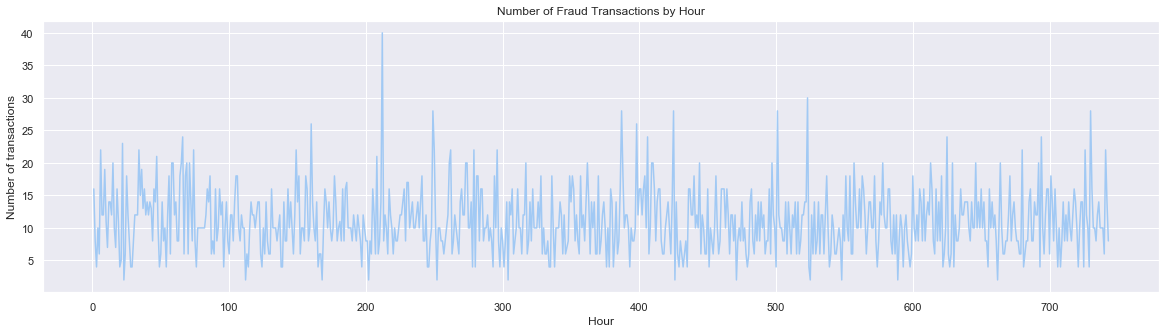

In [47]:
plt.figure(figsize=(20,5))
plt.plot(groupby_step)

plt.title('Number of Fraud Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of transactions')

It is seen that there are at least 2 fraudulent transactions happening every hour and has its peak at the 212th hour (equivalent to the 8th Day 20 Hour), with 40 transactions recorded.

However, the fluctuation shows that there is inconsistency in fraudulent transaction occurence.

Therefore, 'step' could be negligible.

# Model Selection

Non-parametric machine learning methods may be preferred due to the large size of the data and that the goal is accurate classification, not interpretation

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

### Model Preparation
drop columns irrelevant for our modelling. 
These are isFlaggedFraud, nameOrig, nameDest columns.

In [49]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [50]:
# adding feature type1
data_new = data.copy() # creating copy of dataset in case I need original dataset
data_new["Type2"] = np.nan # initializing feature column

# filling feature column
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('C'),"Type2"] = "CC" 
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('M'),"Type2"] = "CM"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('C'),"Type2"] = "MC"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('M'),"Type2"] = "MM"

In [51]:
data_new = data.drop(["isFlaggedFraud",'nameOrig','nameDest'],1)

In [52]:
data_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


In [53]:
# data_new = pd.get_dummies(data_new,prefix=None,drop_first=True)
data_new = pd.get_dummies(data_new, drop_first=True)


In [54]:
data_new.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


In [55]:
data_new.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_TRANSFER'],
      dtype='object')

In [56]:
X = data_new.drop("isFraud",1)
y = data_new.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)
    
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = MinMaxScaler()

# Fit only to the training data
X_train=scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

### Performing Undersampling of Train Data
- **We undersample training data as when we trained classifiers with entire training data all classifiers except RandomForest and Neural Networks classified all points as non-Fraud and failed to detect any Fraud transaction**
- **Our training data is in millions so models will still learn train data well as the undersampled data will still contain enough number of transactions**

**Sample selection methods (prototype selection)**
- There are two types of sample selection methods: the first type is the controlled under-sampling techniques, where the number of under-samples can be specified artificially; the second type is the data cleaning methods, where the number of under-samples cannot be specified.

**In this project, we use the controlled under-sampling techniques:**
- RandomUnderSampler: Selects some of the majority samples by randomly sampling the majority samples with or without put-back.


In [58]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.2)

In [61]:
X_res, y_res = rus.fit_resample(X_train, y_train)

### Logistic Regression
Logistic regression, also known as logistic regression analysis, is a generalized linear regression analysis model, which belongs to supervised learning in machine learning. Its derivation process and calculation is similar to that of regression, but it is actually mainly used to solve classification problems. The model is trained by a given training set and the classification is performed on a given test set at the end of the training.

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
clf = LogisticRegression()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_LR = confusion_matrix(y_test,y_pred)
CR_LR = classification_report(y_test,y_pred)
CM_LRtrain = confusion_matrix(y_train,y_predtrain)
CR_LRtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_LR)
print("Classification Report:\n",CR_LR)
print("Confusion Matrix Train:\n",CM_LRtrain)
print("Classification Report Train:\n",CR_LRtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9904447425148317
Confusion Matrix:
 [[685270   5244]
 [  1374    715]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    690514
           1       0.12      0.34      0.18      2089

    accuracy                           0.99    692603
   macro avg       0.56      0.67      0.59    692603
weighted avg       1.00      0.99      0.99    692603

Confusion Matrix Train:
 [[2055760   15922]
 [   4073    2051]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   2071682
           1       0.11      0.33      0.17      6124

    accuracy                           0.99   2077806
   macro avg       0.56      0.66      0.58   2077806
weighted avg       1.00      0.99      0.99   2077806

Precision: 0.11998657492867931
Recall: 0.34226902824317856
F1: 0.17768389662027834
Area under precision (AUC) Recall: 0.04305150886009589


Text(120.5, 0.5, 'true')

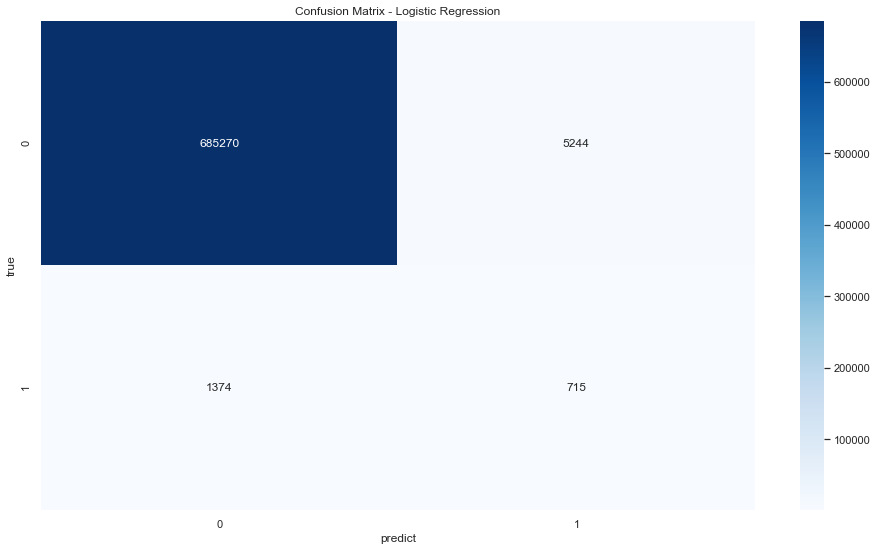

In [115]:
import seaborn as sn

#dataframe
df_lr = pd.DataFrame(CM_LR)
df_lr
ax = sn.heatmap(df_lr,annot=True,fmt='.20g',cmap='Blues')
ax.set_title('Confusion Matrix - Logistic Regression') 
ax.set_xlabel('predict') #x
ax.set_ylabel('true') #y

### RandomForestClassifier
A random forest is an algorithm that generates several decisions trees and pools the results of each tree to make a more robust prediction.

Another great thing about Random Forest is that We can assign weights to each class to reduced the bias of the model towards the majority class.

In [103]:
RF = RandomForestClassifier(n_estimators=15,oob_score=True,class_weight='balanced',n_jobs=-1)

RF.fit(X_train, y_train)

y_pred= RF.predict(X_test)
y_predtrain=RF.predict(X_train) 
     
# Evaluating model
CM_RF_train=confusion_matrix(y_train,y_predtrain)
CR_RF_train= classification_report(y_train,y_predtrain)
CM_RF = confusion_matrix(y_test,y_pred)
CR_RF = classification_report(y_test,y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_RF)
print("Classification Report:\n",CR_RF)
print("Confusion Matrix Train Data:\n",CM_RF_train)
print("Classification Report Train Data:\n",CR_RF_train)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9992751980571842
Confusion Matrix:
 [[690477     37]
 [   465   1624]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    690514
           1       0.98      0.78      0.87      2089

    accuracy                           1.00    692603
   macro avg       0.99      0.89      0.93    692603
weighted avg       1.00      1.00      1.00    692603

Confusion Matrix Train Data:
 [[2071680       2]
 [    136    5988]]
Classification Report Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   2071682
           1       1.00      0.98      0.99      6124

    accuracy                           1.00   2077806
   macro avg       1.00      0.99      0.99   2077806
weighted avg       1.00      1.00      1.00   2077806

Precision: 0.9777242624924745
Recall: 0.7774054571565342
F1: 0.8661333333333333
Area under precision (AUC) Recall: 0.7607595575416732


Text(120.5, 0.5, 'true')

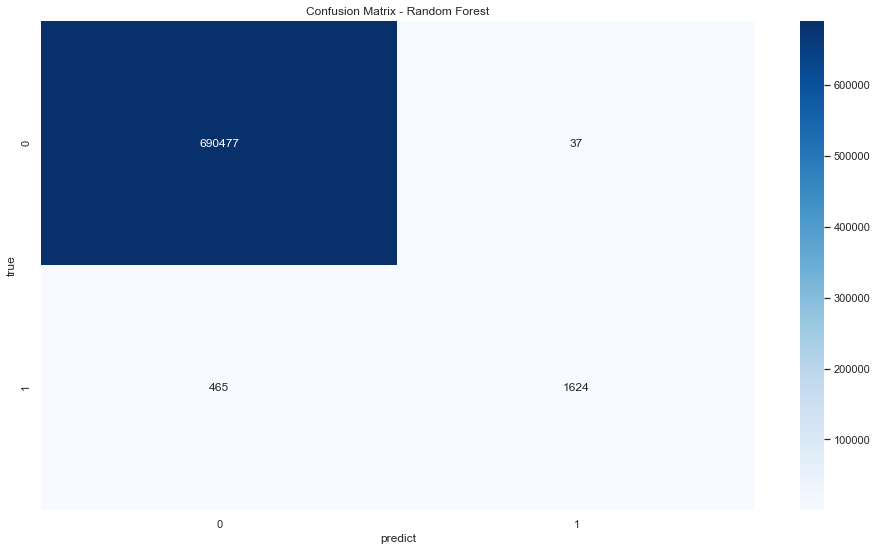

In [111]:
import seaborn as sn

# cm = confusion_matrix(y_test,y_pred,labels=[0,1])

cm
#dataframe
df_cm = pd.DataFrame(CM_RF)
df_cm
ax = sn.heatmap(df_cm,annot=True,fmt='.20g',cmap='Blues')
ax.set_title('Confusion Matrix - Random Forest') 
ax.set_xlabel('predict') #x
ax.set_ylabel('true') #y

### Artificial Neural Networks
Artificial Neural Network (ANN) is a hot research topic in the field of artificial intelligence since 1980s. It abstracts the neuronal network of human brain from the perspective of information processing, and builds some simple models to form different networks with different connections. In engineering and academic circles, it is often referred to as neural network or neural-like network.
A neural network is an operational model consisting of a large number of nodes (or neurons) interconnected with each other. Each node represents a specific output function, called the activation function, and each connection between two nodes represents a weighted value for the signal passing through the connection, called the weight, which is equivalent to the memory of an artificial neural network. The output of the network varies depending on the connection method, the weight value and the activation function.

In [73]:
import tensorflow as tf
from tensorflow import keras


# model = keras.Sequential([
#     keras.layers.Dense(15, input_shape=(12,), activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=[None, 7], activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model
# model

In [74]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
64932/64932 [==============================] - 40s 616us/step - loss: 0.0160 - accuracy: 0.9974
Epoch 2/5
64932/64932 [==============================] - 40s 617us/step - loss: 0.0103 - accuracy: 0.9980
Epoch 3/5
64932/64932 [==============================] - 40s 620us/step - loss: 0.0085 - accuracy: 0.9982
Epoch 4/5
64932/64932 [==============================] - 40s 608us/step - loss: 0.0073 - accuracy: 0.9984
Epoch 5/5
64932/64932 [==============================] - 41s 624us/step - loss: 0.0067 - accuracy: 0.9986


In [76]:
Y_pred1=model.predict(X_test)
Y_pred1

array([[2.5399950e-06],
       [9.7475350e-03],
       [2.0569563e-04],
       ...,
       [6.4974804e-05],
       [4.1374564e-04],
       [3.4172803e-02]], dtype=float32)

In [77]:
Y_pred=np.where(Y_pred1<0.44,0,1)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [78]:
y_predtrain1=model.predict(X_train)
y_predtrain1

array([[4.0051353e-05],
       [1.9679760e-06],
       [6.0392689e-05],
       ...,
       [4.6606958e-03],
       [9.5242642e-05],
       [1.1822251e-04]], dtype=float32)

In [79]:
y_predtrain=np.where(y_predtrain1<0.38,0,1)
y_predtrain

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [80]:
CM_NN = confusion_matrix(y_test,Y_pred)
CR_NN = classification_report(y_test,Y_pred)
CM_NNtrain = confusion_matrix(y_train,y_predtrain)
CR_NNtrain = classification_report(y_train,y_predtrain)
ROC_AUC_SCORENN= roc_auc_score(y_test, Y_pred)
print("Confusion Matrix:\n",CM_NN)
print("Classification Report:\n",CR_NN)
print("Confusion Matrix Train:\n",CM_NNtrain)
print("Classification Report Train:\n",CR_NNtrain)
print("Area Under Curve:",ROC_AUC_SCORENN)
print("Precision:", precision_score(y_test, Y_pred))
print("Recall:", recall_score(y_test, Y_pred))
print("F1:", f1_score(y_test, Y_pred))

Confusion Matrix:
 [[690504     10]
 [   947   1142]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    690514
           1       0.99      0.55      0.70      2089

    accuracy                           1.00    692603
   macro avg       0.99      0.77      0.85    692603
weighted avg       1.00      1.00      1.00    692603

Confusion Matrix Train:
 [[2071605      77]
 [   2756    3368]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   2071682
           1       0.98      0.55      0.70      6124

    accuracy                           1.00   2077806
   macro avg       0.99      0.77      0.85   2077806
weighted avg       1.00      1.00      1.00   2077806

Area Under Curve: 0.7733292836701398
Precision: 0.9913194444444444
Recall: 0.546673049305888
F1: 0.7047207651959272


In [82]:
Y_pred1=model.predict(X_test)
Y_pred=np.where(Y_pred1<0.44,0,1)
Y_pred
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9748658322300077


Text(120.5, 0.5, 'true')

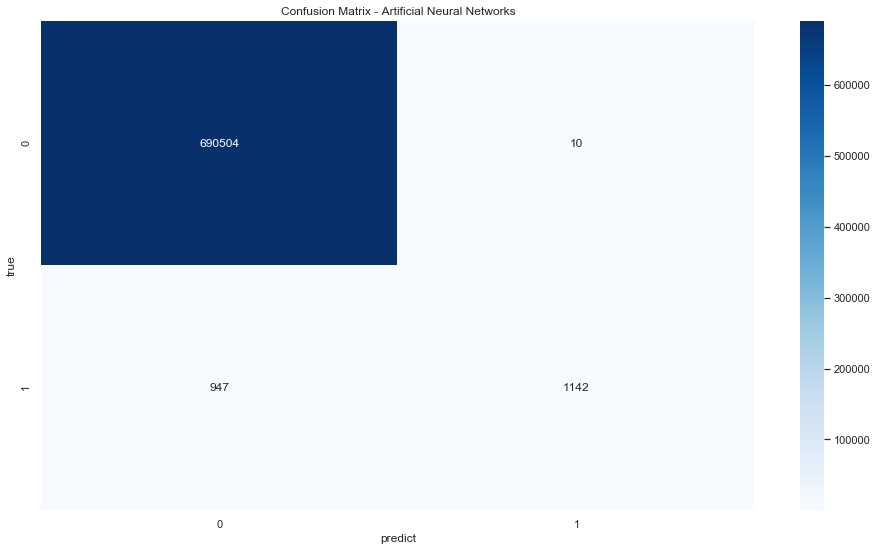

In [116]:
df_nn = pd.DataFrame(CM_NN)
df_nn
ax = sn.heatmap(df_nn,annot=True,fmt='.20g',cmap='Blues')
ax.set_title('Confusion Matrix - Artificial Neural Networks') 
ax.set_xlabel('predict') #x
ax.set_ylabel('true') #y

### Bernoulli Naive Bayes
The Bernoulli model is Boolean in character, i.e., it has only two values, 1 or 0. Unlike the polynomial model, which considers only the features that exist and ignores the calculation of conditional probabilities directly for features that do not exist, the Bernoulli model considers global features, and considers the possibility of nonexistence even if a feature does not exist

In [81]:
clf = BernoulliNB()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_NB = confusion_matrix(y_test,y_pred)
CR_NB = classification_report(y_test,y_pred)
CM_NBtrain = confusion_matrix(y_train,y_predtrain)
CR_NBtrain = classification_report(y_train,y_predtrain)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_NB)
print("Classification Report:\n",CR_NB)
print("Confusion Matrix Train:\n",CM_NBtrain)
print("Classification Report Train:\n",CR_NBtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.9748658322300077
Confusion Matrix:
 [[674130  16384]
 [  1024   1065]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    690514
           1       0.06      0.51      0.11      2089

    accuracy                           0.97    692603
   macro avg       0.53      0.74      0.55    692603
weighted avg       1.00      0.97      0.98    692603

Confusion Matrix Train:
 [[2022227   49455]
 [   3072    3052]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99   2071682
           1       0.06      0.50      0.10      6124

    accuracy                           0.97   2077806
   macro avg       0.53      0.74      0.55   2077806
weighted avg       1.00      0.97      0.98   2077806

Precision: 0.06103501633331423
Recall: 0.5098133078027764
F1: 0.10901832326747876
Area under precision (AUC) Recall: 0.032594944025741784


Text(120.5, 0.5, 'true')

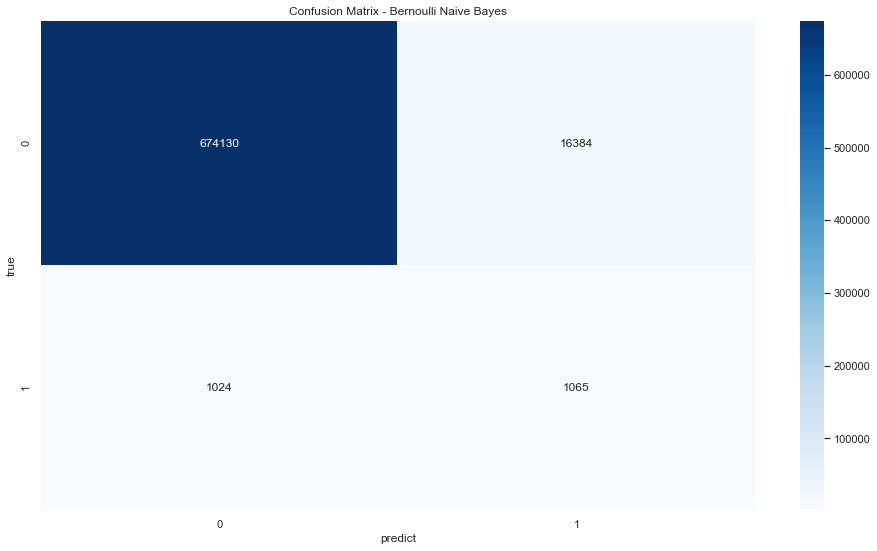

In [119]:
df_nb = pd.DataFrame(CM_NB)
df_nb
ax = sn.heatmap(df_nb,annot=True,fmt='.20g',cmap='Blues')
ax.set_title('Confusion Matrix - Bernoulli Naive Bayes') 
ax.set_xlabel('predict') #x
ax.set_ylabel('true') #y

### Observations and Conclusion


- **When we compare confusion matrices of all the classifiers we observe that RandomForest Classifier does a very good work detecting Fraud Transactions leaving only around 0.005% of Fraud transactions from Test data undetected and when checked on Train data it leaves 0.0003% Fraud transactions undetected.** 
- **The closest model in detecting fraud transactions is Bernoulli Naive Bayes but it still leaves more Fraud transactions from Train and Test data undetected and also it misclassifies considerable Non-Fraud transactions as Fraud which is very undesirable.**
- **RandomForest does misclassify some nonFraud transactions as Fraud but it is less than 0.07% of all non Fraud transactions which is fine if less than 0.07% of nonFraud transactions fail in an attempt to detect 99.99% Fraud transactions.**

**Thus, RandomForest Classifier performs best in detecting Fraud Transactions.**